# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [22]:
#建立模型
model = Sequential()
model.add(Dense(units = 256 , input_dim = 784 , kernel_initializer = 'normal',activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 512 , kernel_initializer = 'normal',activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1024 , kernel_initializer = 'normal',activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10 , kernel_initializer = 'normal',activation = 'softmax' ))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

# 訓練模型

In [23]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [24]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 21s - loss: 0.4524 - accuracy: 0.8604 - val_loss: 0.1675 - val_accuracy: 0.9523
Epoch 2/10
 - 23s - loss: 0.2542 - accuracy: 0.9271 - val_loss: 0.1345 - val_accuracy: 0.9618
Epoch 3/10
 - 22s - loss: 0.2180 - accuracy: 0.9376 - val_loss: 0.1208 - val_accuracy: 0.9661
Epoch 4/10
 - 21s - loss: 0.1989 - accuracy: 0.9439 - val_loss: 0.1082 - val_accuracy: 0.9692
Epoch 5/10
 - 21s - loss: 0.1855 - accuracy: 0.9488 - val_loss: 0.1060 - val_accuracy: 0.9715
Epoch 6/10
 - 21s - loss: 0.1713 - accuracy: 0.9522 - val_loss: 0.1012 - val_accuracy: 0.9717
Epoch 7/10
 - 22s - loss: 0.1685 - accuracy: 0.9535 - val_loss: 0.1013 - val_accuracy: 0.9731
Epoch 8/10
 - 22s - loss: 0.1651 - accuracy: 0.9559 - val_loss: 0.0985 - val_accuracy: 0.9729
Epoch 9/10
 - 23s - loss: 0.1489 - accuracy: 0.9585 - val_loss: 0.0876 - val_accuracy: 0.9762
Epoch 10/10
 - 23s - loss: 0.1543 - accuracy: 0.9592 - val_loss: 0.0946 - val_accuracy: 0.9747


# 以圖形顯示訓練過程

In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

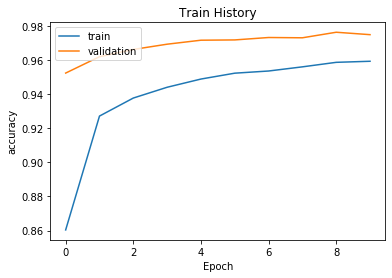

In [26]:
show_train_history(train_history,'accuracy','val_accuracy')

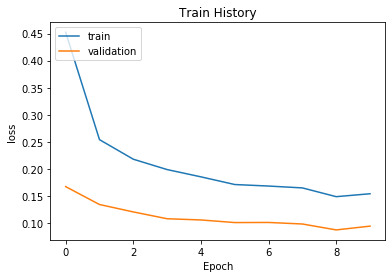

In [27]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [28]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 107us/step

accuracy= 0.9735000133514404
